In [1]:
import nltk
import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.decomposition import NMF
from collections import defaultdict
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import timeit
import pickle
import curses.ascii
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import normalize
nltk.download('wordnet')
nltk.download('maxent_treebank_pos_tagger')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
with open('nytimes_lemma.pkl' , 'rb') as picklefile: 
    nytimes = pickle.load(picklefile)

### Plot gun-related articles by year

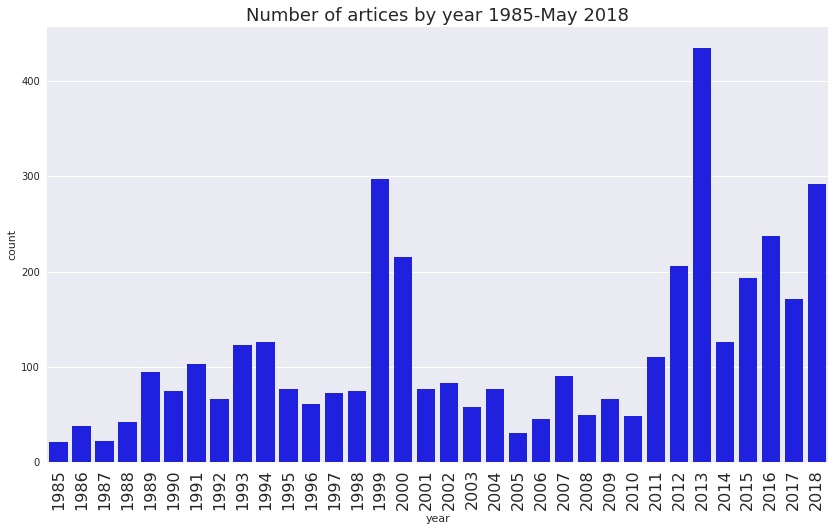

In [3]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,8))
ax = sns.countplot(x="year", data=nytimes,color='blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontdict={'fontsize': 16})
plt.title('Number of artices by year 1985-May 2018', size=18);

### TFIDF

In [4]:
# vectorize
vectorizer = TfidfVectorizer(ngram_range=(1,1),stop_words='english', 
                             token_pattern="\\b[a-z][a-z]+\\b", 
                             min_df=5, max_df=2000)
counts = vectorizer.fit_transform(nytimes['lem_text'])
nyt_feature_names = vectorizer.get_feature_names()
len(nyt_feature_names)

11538

In [5]:
vect_view=pd.DataFrame(counts.toarray(),columns=vectorizer.get_feature_names())
vect_view.head()

,aaron,aback,abandon,abate,abbott,abc,abdicate,abdomen,abel,aberrant,...,zero,zika,zimmer,zimmerman,zimring,zip,zombie,zone,zones,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
counts.shape

(3898, 11538)

### NMF

In [7]:
# create a function to print top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [8]:
components_count = 30
nmf = NMF(n_components=components_count, init='random', max_iter=100, random_state=101)
topic_distr = nmf.fit_transform(counts)

In [9]:
nmf.reconstruction_err_

56.80450929869965

In [10]:
print_top_words(nmf, vectorizer.get_feature_names(), 15)

Topic #0: obama president newtown white congress action american violence biden house shooting executive washington massacre speech
Topic #1: carry concealed permit campus allow texas conceal right university open license handgun public firearm college
Topic #2: ban assault semiautomatic magazine military round import ar automatic ak style bullet sale california ammunition
Topic #3: school student teacher high shooting parkland campus stoneman douglas classroom columbine protest march walkout parent
Topic #4: research violence dr study percent center injury health report prevention death public firearm data homicide
Topic #5: bloomberg mayor michael illegal campaign group ad support candidate election york kelly giuliani coalition virginia
Topic #6: crime criminal sentence violent drug prison penalty commit mandatory justice rate percent convict increase murder
Topic #7: trump republican president florida white donald bump parkland mass stock campaign shooting vega la candidate
Topic #

In [11]:
# test what articles show up on top for different topics
for article_i in np.argsort(topic_distr[:,22])[-10:]:
    print(article_i)
    print(nytimes.iloc[article_i,1])
    print(nytimes.iloc[article_i,0])
    print(nytimes.iloc[article_i,7])
    print("-"*80)

979
b'In Their Own Words'
1998-10-22 00:00:00
https://www.nytimes.com/1998/10/22/nyregion/the-1998-campaign-in-their-own-words.html
--------------------------------------------------------------------------------
965
b'Political Memo; Schumer Looks to Gun Control Fight for a Lift'
1998-07-17 00:00:00
https://www.nytimes.com/1998/07/17/nyregion/political-memo-schumer-looks-to-gun-control-fight-for-a-lift.html
--------------------------------------------------------------------------------
974
b"In Upstate Swing, D'Amato Attacks Schumer on His Voting Record"
1998-09-21 00:00:00
https://www.nytimes.com/1998/09/21/nyregion/1998-campaign-senator-upstate-swing-d-amato-attacks-schumer-his-voting-record.html
--------------------------------------------------------------------------------
976
b"Schumer and D'Amato Try to Out-Tough Each Other on Crime"
1998-09-25 00:00:00
https://www.nytimes.com/1998/09/25/nyregion/schumer-and-d-amato-try-to-out-tough-each-other-on-crime.html
-------------------

In [12]:
topic_words = []
for r in nmf.components_:
    r_normalized = r/sum(r)
    a = sorted([(v,i) for i,v in enumerate(r_normalized)],reverse=True)
    topic_words.append([ f"{nyt_feature_names[e[1]]}, {e[0]:.2%}"  for e in a])

pd.DataFrame(np.array(topic_words).T).iloc[:10,:].T

,0,1,2,3,4,5,6,7,8,9
0,"obama, 3.05%","president, 1.30%","newtown, 0.80%","white, 0.68%","congress, 0.64%","action, 0.50%","american, 0.46%","violence, 0.45%","biden, 0.43%","house, 0.40%"
1,"carry, 3.58%","concealed, 2.42%","permit, 1.99%","campus, 1.18%","allow, 0.99%","texas, 0.84%","conceal, 0.82%","right, 0.62%","university, 0.60%","open, 0.60%"
2,"ban, 3.53%","assault, 3.18%","semiautomatic, 1.70%","magazine, 1.15%","military, 1.01%","round, 0.85%","import, 0.73%","ar, 0.71%","automatic, 0.70%","ak, 0.63%"
3,"school, 4.18%","student, 3.13%","teacher, 1.35%","high, 1.06%","shooting, 0.96%","parkland, 0.96%","campus, 0.83%","stoneman, 0.75%","douglas, 0.70%","classroom, 0.53%"
4,"research, 1.50%","violence, 1.36%","dr, 1.28%","study, 1.23%","percent, 1.16%","center, 0.86%","injury, 0.83%","health, 0.76%","report, 0.64%","prevention, 0.61%"
5,"bloomberg, 4.11%","mayor, 3.78%","michael, 0.86%","illegal, 0.72%","campaign, 0.63%","group, 0.62%","ad, 0.56%","support, 0.50%","candidate, 0.49%","election, 0.49%"
6,"crime, 5.06%","criminal, 1.42%","sentence, 1.28%","violent, 1.17%","drug, 1.05%","prison, 1.03%","penalty, 1.02%","commit, 0.85%","mandatory, 0.65%","justice, 0.63%"
7,"trump, 4.08%","republican, 0.67%","president, 0.64%","florida, 0.45%","white, 0.44%","donald, 0.43%","bump, 0.43%","parkland, 0.43%","mass, 0.41%","stock, 0.40%"
8,"check, 4.89%","background, 4.41%","buyer, 1.13%","record, 0.98%","sale, 0.91%","require, 0.90%","buy, 0.83%","colorado, 0.76%","measure, 0.73%","purchase, 0.71%"
9,"lock, 2.71%","child, 2.21%","smart, 2.17%","technology, 1.80%","trigger, 1.41%","handgun, 1.32%","safety, 1.15%","owner, 0.87%","require, 0.79%","jersey, 0.74%"


In [13]:
# get article distribution per topic
article_top = np.argmax(topic_distr, axis=1)
np.bincount(article_top)

array([158, 334, 298, 151,  82,  73,  25, 103, 104,  47,  71,  81, 225,
        94, 102, 302, 136,  41, 123, 105, 198, 116,  29, 112, 127,  97,
        49, 140, 281,  94])

In [14]:
articledoc_max_top = np.argmax(topic_distr, axis=1)

In [15]:
topic_distr.shape

(3898, 30)

In [16]:
topic_distr[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08148859, 0.        , 0.00914305, 0.        , 0.        ,
       0.06807364, 0.        , 0.        , 0.0013765 , 0.        ,
       0.00903863, 0.        , 0.        , 0.        , 0.        ,
       0.02964783, 0.00559789, 0.00262914, 0.        , 0.00313515,
       0.        , 0.        , 0.        , 0.0130404 , 0.01616303])

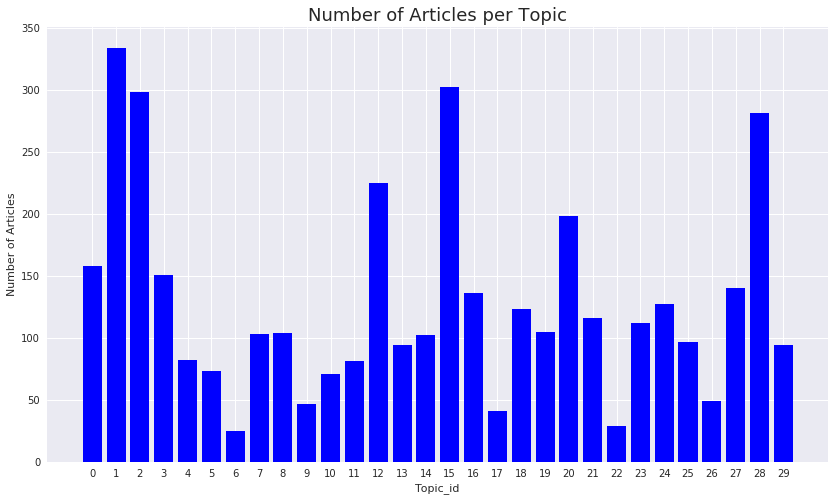

In [17]:
plt.figure(figsize=(14,8))
plt.bar(np.arange(0,components_count), height = np.bincount(article_top), color='blue')
plt.xlabel('Topic_id')
plt.ylabel('Number of Articles')
plt.xticks(np.arange(0,components_count))
plt.title('Number of Articles per Topic', size=18);
# plt.savefig('topic_distr.pdf', dpi=120)

### TSNE

In [18]:
doc_plot = TSNE(verbose=1, metric="cosine").fit_transform(topic_distr)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3898 samples in 0.001s...
[t-SNE] Computed neighbors for 3898 samples in 0.370s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3898
[t-SNE] Computed conditional probabilities for sample 2000 / 3898
[t-SNE] Computed conditional probabilities for sample 3000 / 3898
[t-SNE] Computed conditional probabilities for sample 3898 / 3898
[t-SNE] Mean sigma: 0.169897
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.952576
[t-SNE] Error after 1000 iterations: 1.235304


In [19]:
topics = list(range(len(nmf.components_)))

In [20]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", components_count))

    # We create a scatter plot.
    f = plt.figure(figsize=(16, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(components_count):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    plt.title('TSNE Plot with 30 gun-control related topics', size=18)

    return f, ax, sc, txts

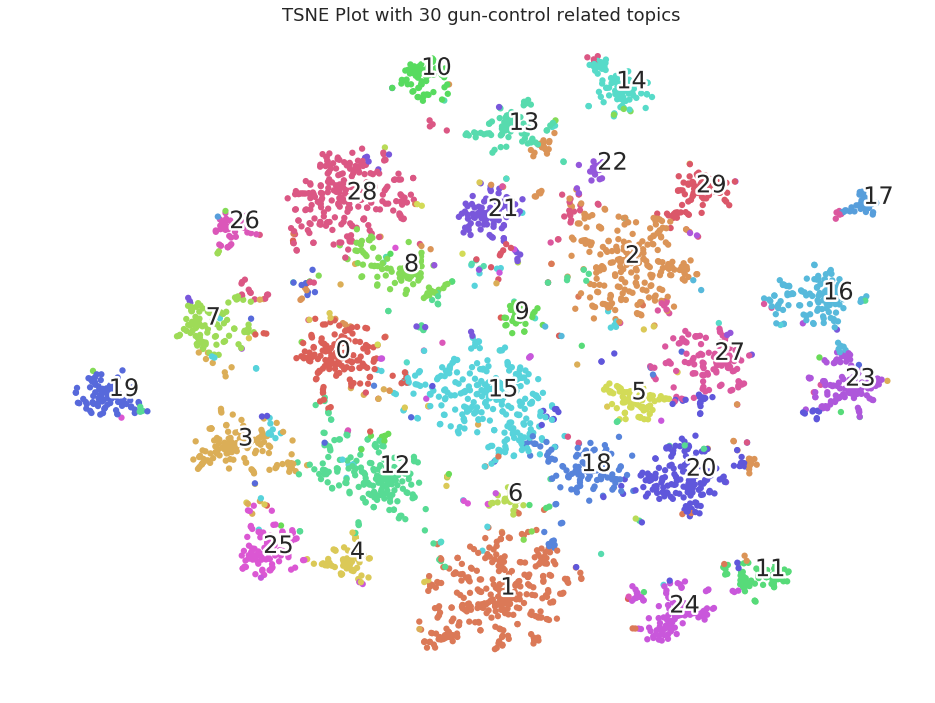

In [21]:
scatter(doc_plot,articledoc_max_top);
# plt.savefig('digits_tsne-generated.pdf', dpi=120)

### Topics plotted by year

In [22]:
# based on the top words in each topics I came up with the following topic names
topic_names = [
    'Obama',
    'concealed carry',
    'assault weapons ban',
    'parkland shooting',
    'research on gun control',
    'Bloomberg',
    'prisons/convicts',
    'las vegas & parkland',
    'background checks',
    'gun safety',
    'Cuomo',
    'Columbia v. Heller case',
    'Noise',
    'jersey gov gun control',
    'brady ban',
    'killings and shootings',
    'pension funds investement in gun manufacturers',
    'mexican border operations',
    'police',
    'mental health',
    'politician stance on gun control',
    'Clintons',
    'Shummer',
    'lawsuits against manufacturers',
    '2nd amendment',
    'gun related death',
    'terrorism',
    'gun purchase requirements',
    'dem/rep gun control debate ',
    'bush vs gore run'
]

In [23]:
# put topic distr into a dataframe
td_df = pd.DataFrame(columns=topic_names, data=topic_distr)

In [24]:
# merge with the original nytimes dataframe
nytimes_td = pd.merge(nytimes, td_df, left_index=True, right_index=True)
nytimes_td.head()

,date,headline,id,score,snippet,source,type,url,word_count,article_text,...,politician stance on gun control,Clintons,Shummer,lawsuits against manufacturers,2nd amendment,gun related death,terrorism,gun purchase requirements,dem/rep gun control debate,bush vs gore run
0,1985-02-19,"b'KOCH, IN WAHINGTON, HAS PRAISE FOR CUOMO'",4fd141f48eb7c8105d61a513,0.037857,"b""Once a political rival, sometimes a politica...",The New York Times,News,https://www.nytimes.com/1985/02/19/nyregion/ko...,609,"Once a political rival, sometimes a political...",...,0.029648,0.005598,0.002629,0.0,0.003135,0.000000,0.000000,0.000000,0.013040,0.016163
1,1985-03-06,b'Senate Seeks to Ease Restrictions on Guns',4fd14eb08eb7c8105d62ed73,0.057113,b'The State Senate passed a bill today that wo...,The New York Times,News,https://www.nytimes.com/1985/03/06/nyregion/se...,161,The State Senate passed a bill today that wou...,...,0.178831,0.000000,0.000182,0.0,0.000000,0.000000,0.000000,0.000000,0.055521,0.000000
2,1985-04-09,"b""We're Killing One Another at a Great Rate""",4fd15c448eb7c8105d64316d,0.086703,b'To the Editor: According to a recent rep...,The New York Times,Letter,https://www.nytimes.com/1985/04/09/opinion/l-w...,313,To the Editor: According to a recent report b...,...,0.017746,0.000000,0.000000,0.0,0.021249,0.023986,0.000182,0.028591,0.000000,0.000000
3,1985-04-17,"b""Focusing on Guns Won't Alter Crime in the U.S.""",4fd142658eb7c8105d61ad2a,0.066921,"b""To the Editor: ''We're Killing One Anoth...",The New York Times,Letter,https://www.nytimes.com/1985/04/17/opinion/l-f...,363,To the Editor: ''We're Killing One Another at...,...,0.000000,0.000000,0.000017,0.0,0.014120,0.044083,0.000000,0.052680,0.003021,0.000000
4,1985-05-06,b'Gun Group Cites Bias in Press',4fd14cf48eb7c8105d62bf15,0.090196,"b""The new president of the National Rifle Asso...",The New York Times,News,https://www.nytimes.com/1985/05/06/us/gun-grou...,221,The new president of the National Rifle Assoc...,...,0.000000,0.001449,0.003579,0.0,0.068813,0.000000,0.000000,0.000000,0.009713,0.010101


In [25]:
# normalize topic weights
topics_by_year = normalize(topic_distr, norm='l1', axis=1, copy=True, return_norm=False)

In [26]:
topics_df = pd.DataFrame(data=topics_by_year, columns = topic_names)

In [27]:
topics_df['year']=nytimes_td['year'].astype('int64')

In [28]:
topics_df.head()

,Obama,concealed carry,assault weapons ban,parkland shooting,research on gun control,Bloomberg,prisons/convicts,las vegas & parkland,background checks,gun safety,...,Clintons,Shummer,lawsuits against manufacturers,2nd amendment,gun related death,terrorism,gun purchase requirements,dem/rep gun control debate,bush vs gore run,year
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.340481,0.000000,0.038202,0.000000,0.000000,...,0.023389,0.010985,0.0,0.013099,0.000000,0.000000,0.000000,0.054486,0.067533,1985.0
1,0.000000,0.370372,0.000000,0.000000,0.000000,0.000000,0.015040,0.000000,0.000000,0.000000,...,0.000000,0.000426,0.0,0.000000,0.000000,0.000000,0.000000,0.129888,0.000000,1985.0
2,0.000000,0.075350,0.032301,0.000000,0.036639,0.000000,0.013798,0.000000,0.023822,0.090042,...,0.000000,0.000000,0.0,0.084916,0.095854,0.000728,0.114259,0.000000,0.000000,1985.0
3,0.000000,0.000000,0.031617,0.000000,0.096615,0.008620,0.086028,0.000000,0.000000,0.000000,...,0.000000,0.000070,0.0,0.058788,0.183536,0.000000,0.219331,0.012579,0.000000,1985.0
4,0.018135,0.000000,0.000000,0.002425,0.051993,0.028887,0.000000,0.010714,0.000000,0.000000,...,0.008607,0.021252,0.0,0.408633,0.000000,0.000000,0.000000,0.057681,0.059985,1985.0


In [29]:
# get average topic weight by year
topics_by_year = topics_df.groupby('year')[topic_names].mean()

In [30]:
topics_by_year.index = topics_by_year.index

In [31]:
topics_by_year.head()

,Obama,concealed carry,assault weapons ban,parkland shooting,research on gun control,Bloomberg,prisons/convicts,las vegas & parkland,background checks,gun safety,...,politician stance on gun control,Clintons,Shummer,lawsuits against manufacturers,2nd amendment,gun related death,terrorism,gun purchase requirements,dem/rep gun control debate,bush vs gore run
year,,,,,,,,,,,,,,,,,,,,,
1985.0,0.002426,0.072478,0.076163,0.006981,0.012015,0.022743,0.021999,0.005752,0.017533,0.013077,...,0.071385,0.003110,0.031465,0.001372,0.050824,0.026700,0.009592,0.113476,0.119653,0.015007
1986.0,0.014328,0.070148,0.070679,0.007822,0.014234,0.003909,0.018147,0.001734,0.014069,0.013409,...,0.056295,0.002526,0.005608,0.004918,0.036291,0.032550,0.012610,0.144505,0.102884,0.013690
1987.0,0.024513,0.146976,0.036358,0.002627,0.012143,0.010202,0.044733,0.006024,0.016939,0.012745,...,0.090823,0.026405,0.002825,0.022390,0.061268,0.058148,0.020034,0.033006,0.017926,0.014430
1988.0,0.007230,0.052525,0.074967,0.002313,0.026985,0.015828,0.029062,0.004654,0.010949,0.012943,...,0.061015,0.013652,0.013616,0.009880,0.040734,0.034613,0.006070,0.032109,0.045457,0.052249
1989.0,0.012634,0.032357,0.285620,0.010980,0.013824,0.004814,0.035142,0.003138,0.017279,0.014240,...,0.052962,0.008994,0.002570,0.013918,0.053139,0.011892,0.008375,0.038591,0.032626,0.097812


In [32]:
# save into a csv for future topic modeling
# topics_by_year_2.to_csv('topics_by_year_2.csv')

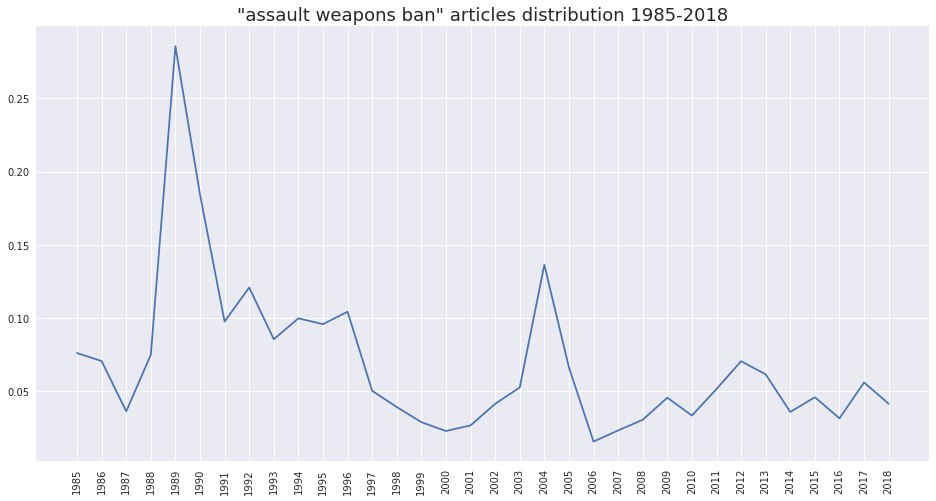

In [33]:
# check distribution of a specific topic
topic_name = 'assault weapons ban'
y = topics_by_year[topic_name]
plt.figure(figsize=(16, 8))
plt.plot(list(topics_by_year.index), y)
plt.xticks(list(topics_by_year.index),rotation=90)
plt.title(f'"{topic_name}" articles distribution 1985-2018',fontsize=18);

In [34]:
# test what articles show up on top for different topics
for article_i in np.argsort(topic_distr[:,2])[-20:]:
    print(article_i)
    print(nytimes.iloc[article_i,1])
    print(nytimes.iloc[article_i,0])
    print(nytimes.iloc[article_i,7])
    print("-"*80)

201
b'Assault Rifles: Despite Curb, No Shortage'
1989-09-16 00:00:00
https://www.nytimes.com/1989/09/16/us/assault-rifles-despite-curb-no-shortage.html
--------------------------------------------------------------------------------
2368
b'Myths About Gun Regulation'
2013-02-01 00:00:00
https://www.nytimes.com/2013/02/01/opinion/myths-about-gun-regulation.html
--------------------------------------------------------------------------------
176
b'U.S. Widens Import Curbs on Military-Like Rifles'
1989-04-06 00:00:00
https://www.nytimes.com/1989/04/06/us/us-widens-import-curbs-on-military-like-rifles.html
--------------------------------------------------------------------------------
151
b'IMPACT OF CURBS ON GUNS DEBATED'
1989-03-16 00:00:00
https://www.nytimes.com/1989/03/16/us/impact-of-curbs-on-guns-debated.html
--------------------------------------------------------------------------------
3129
b'Specter of 1994 Assault Weapons Ban Lingers Over New Gun Control Push'
2016-06-19 00:00

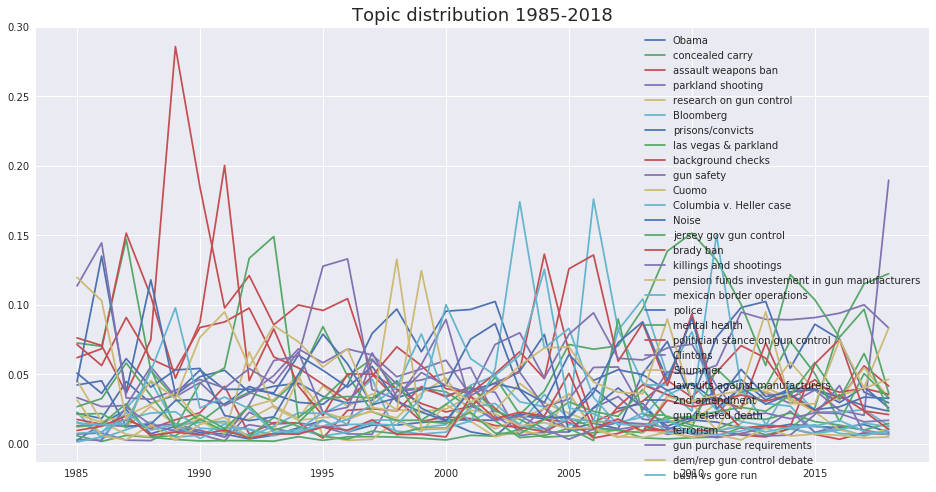

In [35]:
plt.figure(figsize=(16, 8))
x = list(topics_by_year.index)

for topic in list(topics_by_year.columns):
    y = topics_by_year[topic]
    plt.plot(x, y, label=topic)

plt.legend(list(topics_by_year.columns))
plt.title('Topic distribution 1985-2018',fontsize=18);

## Topic Modeling on articles containg 'lawsuit'

#### Test: find articles containing ['law suit'] and check year distribution

In [36]:
check_for = ['lawsuit','suit against','suits against']

In [37]:
nytimes['lem_text'] = nytimes['lem_text'].map(lambda x: x.lower())
nytimes['lawsuit'] = [any(x in article for x in check_for) for article in nytimes['lem_text']]

In [38]:
lawsuits = nytimes[nytimes.lawsuit==True]
len(lawsuits)

347

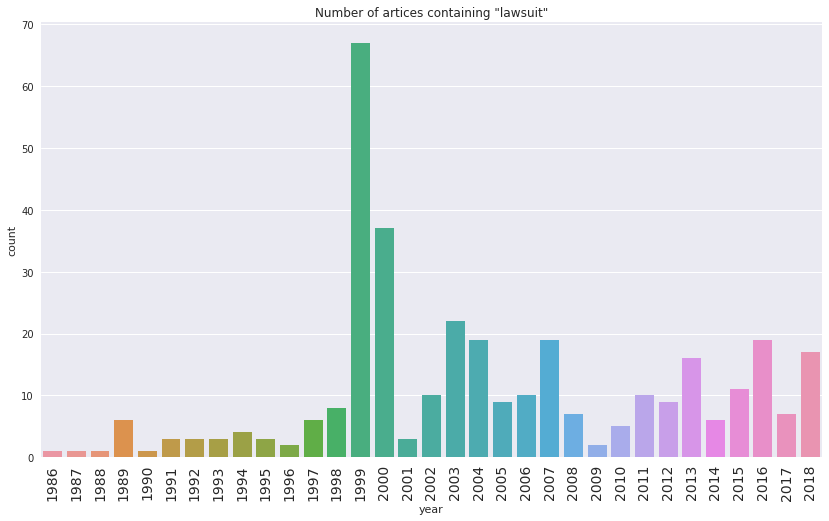

In [39]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="year", data=lawsuits)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontdict={'fontsize': 14})
plt.title('Number of artices containing "lawsuit"');

In [40]:
# grab data from this site and merge with lawsuits
# http://www.people-press.org/2017/06/22/public-views-about-guns/#all
pew_poll = pd.read_csv('pew_overall.csv')

In [41]:
# crate a function that takes a string and lemmatizes it 
def lemmatizer(text):
    tokens = word_tokenize(text)
    tagged = nltk.pos_tag(tokens)
    lemmatizer = WordNetLemmatizer()
    lem_words = []
    for tagged_word in tagged:
        word = tagged_word[0].lower()
        if tagged_word[1].startswith('VB'):
            word_tag = 'v'
        elif tagged_word[1].startswith('JJ'):
            word_tag = 'a'
        elif tagged_word[1].startswith('RB'):
            word_tag = 'r'
        else:
            word_tag = 'n'
                 
        lem_words.append(lemmatizer.lemmatize(word,pos=word_tag))
    return(lem_words)

In [42]:
lawsuits['lem_tokens'] = [lemmatizer(article) for article in lawsuits['article_text']]
lawsuits['lem_text'] = [" ".join(lems) for lems in lawsuits['lem_tokens']]

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
# test count vectorizer min_df levels to see how many words get cut out 
num_of_features = defaultdict()
lin = np.arange(1,30)
for l in lin:
    vectorizer = TfidfVectorizer(ngram_range=(1,1),stop_words='english', token_pattern="\\b[a-z][a-z]+\\b", min_df=l)
    counts = vectorizer.fit_transform(lawsuits['lem_text'])
    lsuit_feature_names = vectorizer.get_feature_names()
    num_of_features[l] = len(lsuit_feature_names)

Text(0,0.5,'number of features')

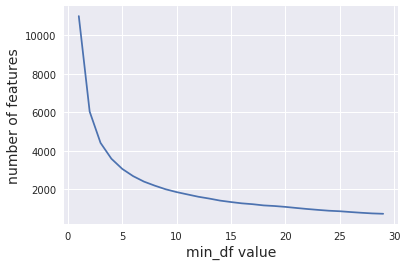

In [44]:
# plot how number of features change with min_df
plt.plot(num_of_features.keys(), num_of_features.values())
plt.xlabel('min_df value', size=14)
plt.ylabel('number of features', size=14)

In [45]:
# test max_df
num_of_features_max_df = defaultdict()
lin = np.arange(150,310,10)
for l in lin:
    vectorizer = TfidfVectorizer(ngram_range=(1,1),stop_words='english', token_pattern="\\b[a-z][a-z]+\\b", max_df=l)
    counts = vectorizer.fit_transform(lawsuits['lem_text'])
    nyt_feature_names = vectorizer.get_feature_names()
    num_of_features_max_df[l] = len(nyt_feature_names)

Text(0,0.5,'number of features')

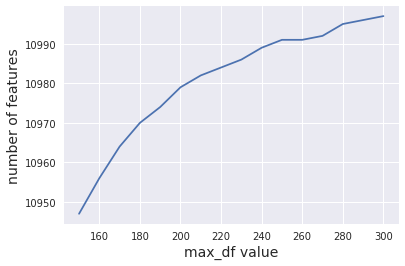

In [46]:
plt.plot(num_of_features_max_df.keys(), num_of_features_max_df.values())
plt.xlabel('max_df value', size=14)
plt.ylabel('number of features', size=14)

In [47]:
# vectorize!
min_input=5
max_input=150


vectorizer = TfidfVectorizer(ngram_range=(1,1),stop_words='english', 
                             token_pattern="\\b[a-z][a-z]+\\b", 
                             min_df=min_input, max_df=max_input)
lawsuits_vect = vectorizer.fit_transform(lawsuits['lem_text'])
lawsuits_feature_names = vectorizer.get_feature_names()
len(lawsuits_feature_names)

3013

In [48]:
components_count = 10
nmf = NMF(n_components=components_count, init='random', max_iter=100, random_state=101)
lawsuits_topic_distr = nmf.fit_transform(lawsuits_vect)

In [49]:
print_top_words(nmf, vectorizer.get_feature_names(), 10)

Topic #0: company colt spitzer tobacco business bankruptcy talk california sue executive
Topic #1: wesson smith agreement company administration agree deal provision spitzer clinton
Topic #2: bloomberg mayor illegal data investigator giuliani trace tiahrt coalition enforcement
Topic #3: democrat vote republican senator senate measure house ban immunity assault
Topic #4: jury lawyer liable judge plaintiff verdict company trial brooklyn negligent
Topic #5: amendment justice supreme second ban district appeal columbia judge decision
Topic #6: carry concealed school colorado open permit student littleton legislature allow
Topic #7: department police report officer justice percent bureau enforcement investigation record
Topic #8: ar assault newtown sandy hook military civilian family remington connecticut
Topic #9: bush gore texas governor republican candidate vice today sign al



In [50]:
lawsuits_article_top = np.argmax(lawsuits_topic_distr, axis=1)
np.bincount(lawsuits_article_top)

array([49, 21, 33, 43, 35, 37, 41, 45, 24, 19])

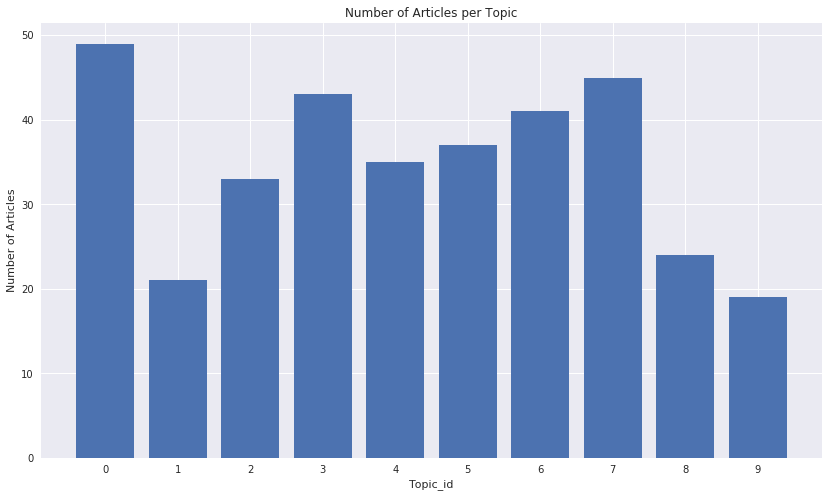

In [51]:
plt.figure(figsize=(14,8))
plt.bar(np.arange(0,components_count), height = np.bincount(lawsuits_article_top))
plt.xlabel('Topic_id')
plt.ylabel('Number of Articles')
plt.xticks(np.arange(0,components_count))
plt.title('Number of Articles per Topic');

In [52]:
for article_i in np.argsort(topic_distr[:,2])[-10:]:
    print(article_i)
    print(nytimes.iloc[article_i,1])
    print(nytimes.iloc[article_i,0])
    print(nytimes.iloc[article_i,7])
    print("-"*80)

2996
b'Where Support for Assault Rifles Is All in \xe2\x80\x98Good, Clean Fun\xe2\x80\x99'
2015-12-20 00:00:00
https://www.nytimes.com/2015/12/20/us/where-support-for-assault-rifles-is-all-in-good-clean-fun.html
--------------------------------------------------------------------------------
124
b'Effort to Ban Assault Rifles Gains Momentum'
1989-01-28 00:00:00
https://www.nytimes.com/1989/01/28/us/effort-to-ban-assault-rifles-gains-momentum.html
--------------------------------------------------------------------------------
635
b'In Gun Debate, Gun Definitions Matter'
1994-05-05 00:00:00
https://www.nytimes.com/1994/05/05/us/in-gun-debate-gun-definitions-matter.html
--------------------------------------------------------------------------------
930
b'A New Squeeze on Gun Imports'
1998-04-07 00:00:00
https://www.nytimes.com/1998/04/07/opinion/a-new-squeeze-on-gun-imports.html
--------------------------------------------------------------------------------
2314
b'Even Defining \xe2\x8